# Test NoveltyDatamodule sanity

In [8]:
import sys

sys.path.append("..")

from src.data import NoveltyDetectionDatamodule
import torchvision
import torch

dm = NoveltyDetectionDatamodule(
    dataset="torchvision.datasets.MNIST",
    dataset_args=dict(
        root="data",
        train=True,
        download=True,
        transform=torchvision.transforms.ToTensor(),  # TODO: add transforms to the base datamodule to be configurable from cli
    ),
    normal_targets=[8],
    batch_size=128,
    num_workers=0,
    pin_memory=True,
)

dm.setup("fit")


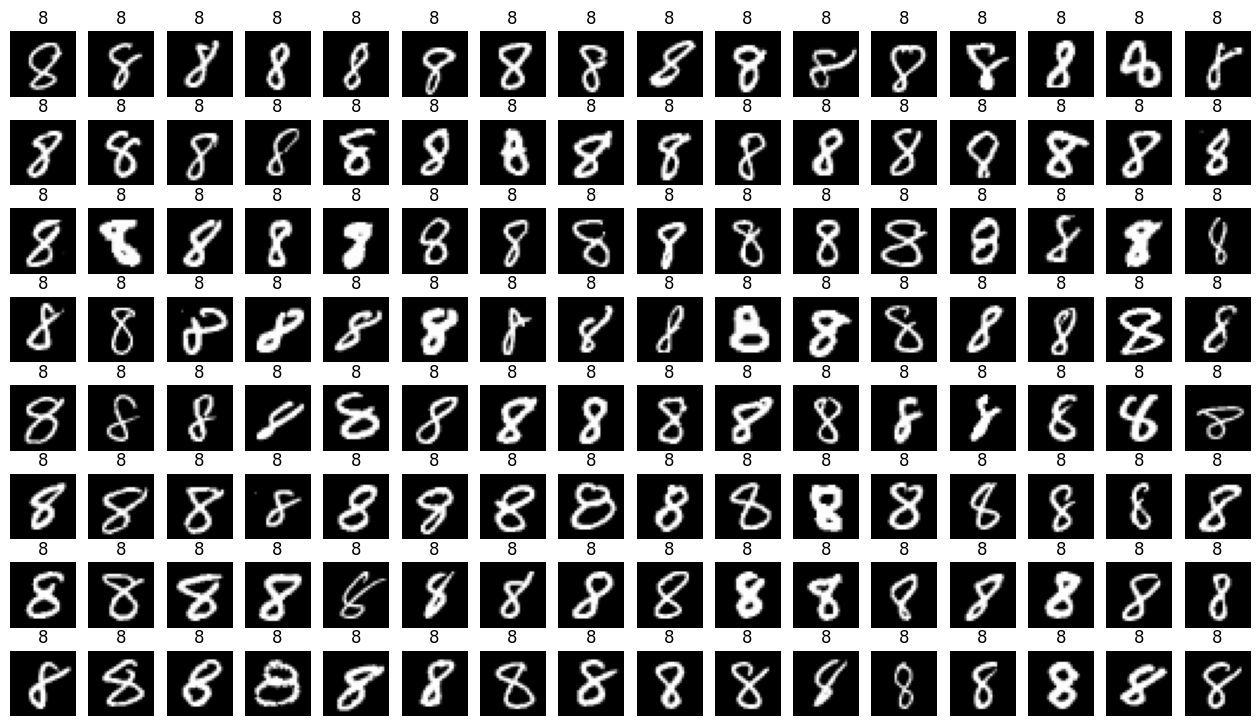

In [15]:
# show the first batch from the training set and their labels
from matplotlib import pyplot as plt
import numpy as np

batch = next(iter(dm.train_dataloader()))
images, labels = batch
images = images.numpy()
labels = labels.numpy()

batch_size = images.shape[0]
n_cols = 16
n_rows = batch_size // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols, n_rows+1))
for i in range(n_rows):
    for j in range(n_cols):
        axes[i, j].imshow(images[i * n_cols + j].squeeze(), cmap='gray')
        axes[i, j].set_title(labels[i * n_cols + j])
        axes[i, j].axis('off')
plt.show()

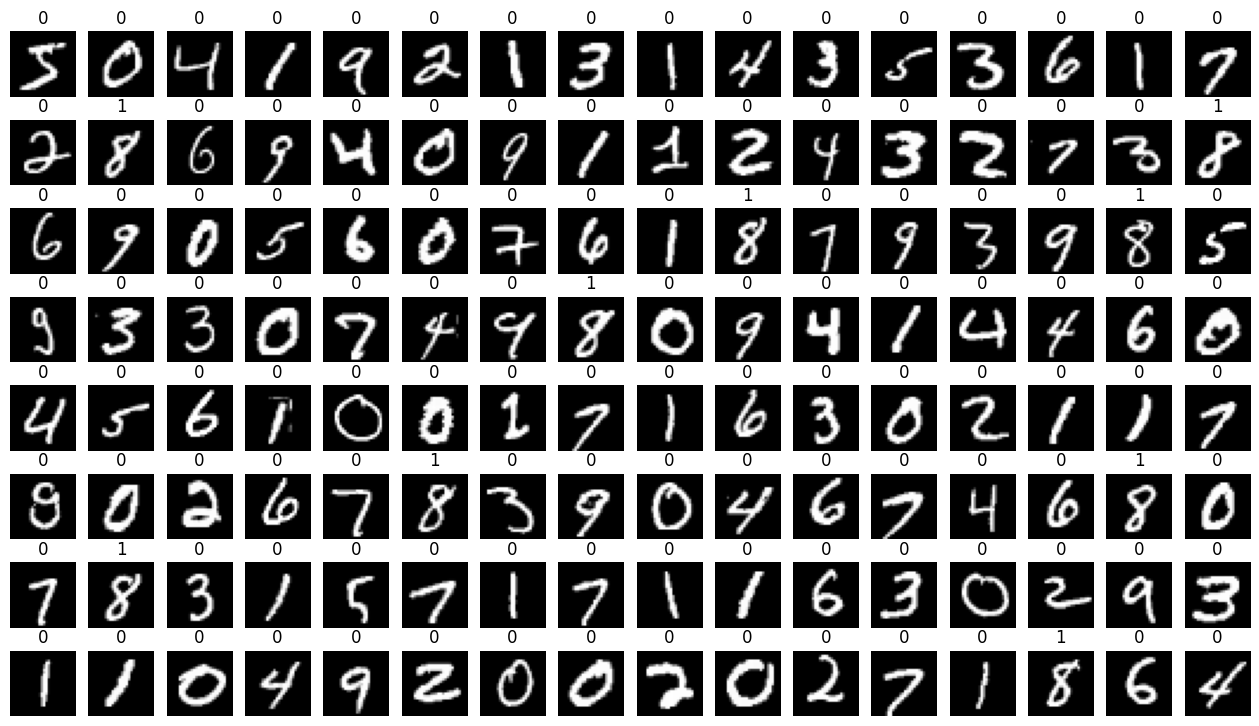

In [16]:
# show the first batch from the validation set and their labels
batch = next(iter(dm.val_dataloader()))
images, labels = batch
images = images.numpy()
labels = labels.numpy()

batch_size = images.shape[0]
n_cols = 16
n_rows = batch_size // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols, n_rows+1))
for i in range(n_rows):
    for j in range(n_cols):
        axes[i, j].imshow(images[i * n_cols + j].squeeze(), cmap='gray')
        axes[i, j].set_title(labels[i * n_cols + j])
        axes[i, j].axis('off')
plt.show()
